Iteration 0: Best Cost = 14.284784963261059
Iteration 1: Best Cost = 14.284784963261059
Iteration 2: Best Cost = 12.136763385873152
Iteration 3: Best Cost = 5.814187204399129
Iteration 4: Best Cost = 3.1924420694030964
Iteration 5: Best Cost = 1.709760566226763
Iteration 6: Best Cost = 1.1974114679537102
Iteration 7: Best Cost = 0.6153827208930334
Iteration 8: Best Cost = 0.5477714851259197
Iteration 9: Best Cost = 0.2946687246756175
Iteration 10: Best Cost = 0.02190181100311504
Iteration 11: Best Cost = 0.02190181100311504
Iteration 12: Best Cost = 0.02190181100311504
Iteration 13: Best Cost = 0.02190181100311504
Iteration 14: Best Cost = 0.02190181100311504
Iteration 15: Best Cost = 0.02190181100311504
Iteration 16: Best Cost = 0.014758531849424227
Iteration 17: Best Cost = 0.009684710971018095
Iteration 18: Best Cost = 0.004150519755814819
Iteration 19: Best Cost = 0.004150519755814819
Iteration 20: Best Cost = 0.0023449291828168115
Iteration 21: Best Cost = 0.0017717147288407267
It

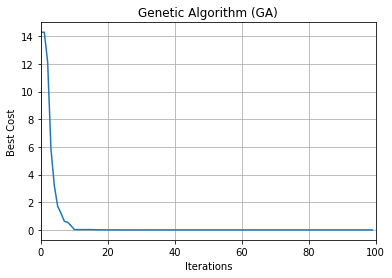

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ypstruct import structure 

# Sphere Test Function
def sphere(x):
    return sum(x**2)

#Problem Definition
problem = structure()
problem.costfunc = sphere
# search space
problem.nvar = 5
problem.varmin = -10
problem.varmax = 10

# GA Parameters
params = structure()
params.maxit = 100
params.npop = 50
params.pc = 1
params.gamma = 0.1
params.mu = 0.01
params.sigma = 0.1


# run GA function
out = run(problem, params)

# Plotting Results
plt.plot(out.bestcost)
# plt.semilogy(out.bestcost)
plt.xlim(0, params.maxit)
plt.xlabel("Iterations")
plt.ylabel("Best Cost")
plt.title("Genetic Algorithm (GA)")
plt.grid(True)
plt.show()


In [52]:
# Run GA
def run(problem, params):
    # Problem info
    costfunc = problem.costfunc
    nvar = problem.nvar
    varmin = problem.varmin
    varmax = problem.varmax
    
    # Paramters
    maxit = params.maxit
    npop = params.npop
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma    
    
    #Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None
    
    #BestSolution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf
    
    #  Initialize Population Array - First Generation
    #pop - population
    pop = empty_individual.repeat(npop)
    for i in range(npop):
        pop[i].position = np.random.uniform(varmin, varmax, nvar)
        pop[i].cost = costfunc(pop[i].position)
        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()
            
    # Best Cost of Iterations
    bestcost = np.empty(maxit)
    
    
    
    #Main Loop
    for it in range(maxit):
        #popc - population of children
        #nc - number of children
        popc = []
        for k in range(nc//2):
            #Select parents randomly using permutations
            q = np.random.permutation(npop)
            p1 = pop[q[0]]
            p2 = pop[q[1]]
            
            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)
            
            # Perform Mutation
            c1 = mutate(c1, mu, sigma)
            c2 = mutate(c2, mu, sigma)
            
            # Apply Bounds to Offspring Positions
            apply_bound(c1, varmin, varmax)
            apply_bound(c2, varmin, varmax)
            
            # Evaluate First Offspring
            c1.cost = costfunc(c1.position)
            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()
                
            # Evaluate Second Offspring
            c2.cost = costfunc(c2.position)
            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()
                
            # Add Offspring to Population
            popc.append(c1)
            popc.append(c2)
            
        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
        print("Iteration {}: Best Cost = {}".format(it, bestcost[it]))
     
        
    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    return out

# Crossover Function
def crossover(p1, p2, gamma=0.1):
    c1 = p1.deepcopy()
    c2 = p1.deepcopy()
    alpha = np.random.uniform(-gamma, 1+gamma, *c1.position.shape)
    c1.position = alpha*p1.position + (1-alpha)*p2.position
    c2.position = alpha*p2.position + (1-alpha)*p1.position
    return c1, c2
    
# Mutation Function
def mutate(x, mu, sigma):
    #sigma is the Standard deviation
    y = x.deepcopy()
    # Define which gene gets mutated
    flag = np.random.rand(*x.position.shape) <= mu
    #argwhere - return indices where expresssions is true
    ind = np.argwhere(flag)
    y.position[ind] += sigma*np.random.randn(*ind.shape)
    return y
    

def apply_bound(x, varmin, varmax):
    x.position = np.maximum(x.position, varmin)
    x.position = np.minimum(x.position, varmax)
    